Importations

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import inspect

Parameters of Option

In [2]:
def get_option_type():
    while True:
        option_type = input('Enter the type of the Option (Call or Put): ')
        if option_type.lower() in ['call', 'put']:
            return option_type.capitalize()
        else:
            print("Invalid input. Please enter 'Call' or 'Put'.")

def get_underlying_asset_price():
    while True:
        S = input('Enter the Underlying Asset Price : ')
        try:
            underlying_asset_price = int(S)
            return underlying_asset_price
        except ValueError:
            print("Invalid number type. Please enter an integer number.")

def get_strike_price():
    while True:
        K = input('Enter the Strike Price : ')
        try:
            strike_price = int(K)
            return strike_price
        except ValueError:
            print("Invalid number type. Please enter an integer number.")

def get_maturity():
    while True:
        M = input('Enter the Maturity (in years): ')
        try:
            maturity = float(M)
            if maturity > 0:
                return maturity
            else:
                print("Invalid value. Please enter a positive number.")
        except ValueError:
            print("Invalid number type. Please enter a valid number.")
            
def get_volatility():
    while True:
        vol = input('Enter the Volatility (between 0 and 1): ')
        try:
            volatility = float(vol)
            if 0 <= volatility <= 1:
                return volatility
            else:
                print("Invalid value. Please enter a number between 0 and 1.")
        except ValueError:
            print("Invalid number type. Please enter a decimal number between 0 and 1.")

def get_rf():
    while True:
        rf = input('Enter the Risk-Free Interest rate (between 0 and 1): ')
        try:
            risk_free = float(rf)
            if 0 <= risk_free <= 1:
                return risk_free
            else:
                print("Invalid value. Please enter a number between 0 and 1.")
        except ValueError:
            print("Invalid number type. Please enter a decimal number between 0 and 1.")

def get_dividend():
    while True:
        d = input('Enter the Dividend Rate (between 0 and 1): ')
        try:
            div_rate = float(d)
            if 0 <= div_rate <= 1:
                return div_rate
            else:
                print("Invalid value. Please enter a number between 0 and 1.")
        except ValueError:
            print("Invalid number type. Please enter a decimal number between 0 and 1.")


In [3]:
Option_type = get_option_type()
print(f"Option Type: {Option_type}")

S=get_underlying_asset_price()
print(f"Underlying Asset Price: {S} $")

K = get_strike_price()
print(f"Strike Price: {K} $")

T=get_maturity()
print(f"Volatility: {T} years")

volatility = get_volatility()
print(f"Volatility: {volatility*100} %")

r = get_rf()
print(f"Risk-Free: {r*100} %")

q = get_dividend()
print(f"Dividend: {q*100} %")

Invalid input. Please enter 'Call' or 'Put'.
Option Type: Call
Invalid number type. Please enter an integer number.
Underlying Asset Price: 100 $
Invalid number type. Please enter an integer number.
Strike Price: 110 $
Invalid number type. Please enter a valid number.
Volatility: 1.0 years
Invalid number type. Please enter a decimal number between 0 and 1.
Volatility: 20.0 %
Invalid number type. Please enter a decimal number between 0 and 1.
Risk-Free: 5.0 %
Invalid number type. Please enter a decimal number between 0 and 1.
Dividend: 2.0 %


Binomial Tree & Greeks Calculations

In [110]:
def get_treedepth():
    while True:
        steps = input('Enter the Depth of the Tree (between 0 and 100): ')
        try:
            steps = int(steps)
            if 0 <= steps <= 100:
                return steps
            else:
                print("Invalid value. Please enter a number between 0 and 100.")
        except ValueError:
            print("Invalid number type. Please enter a integer number between 0 and 100.")

In [111]:
N=get_treedepth()
print(f"Depth: {N}")

Depth: 10


In [361]:
def binomial_tree_method(S, K, T, r, volatility, q, N, Option_type):
    """
    Calculates the price of an American option and its Greeks (Delta, Gamma, Theta, Vega, Rho)
    using the binomial tree model.

    Parameters:
    - S: Initial price of the underlying asset
    - K: Strike price of the option
    - T: Time to maturity of the option
    - r: Risk-free interest rate (annualized, continuously compounded)
    - volatility: Volatility of the underlying asset
    - q: Dividend yield of the underlying asset (continuous)
    - N: Number of steps in the binomial tree
    - Option_type: Type of the option ('call' or 'put')

    Returns:
    - option_price: Price of the American option
    - asset_prices: 2D list of asset prices at each node of the binomial tree
    - option_values: 2D list of option values at each node
    - greeks_data: Dictionary containing Delta, Gamma, Theta, Vega, Rho
    """
    delta_T = T / N
    up = math.exp(volatility * math.sqrt(delta_T))
    down = math.exp(-volatility * math.sqrt(delta_T))
    p = (math.exp((r - q) * delta_T) - down) / (up - down)
    discount_factor = math.exp(-r * delta_T)

    asset_prices = [[0 for _ in range(j + 1)] for j in range(N + 1)]
    option_values = [[0 for _ in range(j + 1)] for j in range(N + 1)]

    for j in range(N + 1):
        asset_prices[N][j] = S * (up ** j) * (down ** (N - j))
        if Option_type.lower() == 'call':
            option_values[N][j] = max(asset_prices[N][j] - K, 0)
        else:
            option_values[N][j] = max(K - asset_prices[N][j], 0)

    delta = [[0 for _ in range(j + 1)] for j in range(N)]
    gamma = [[0 for _ in range(j + 1)] for j in range(N)]
    theta = [[0 for _ in range(j + 1)] for j in range(N)]

    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            asset_prices[i][j] = S * (up ** j) * (down ** (i - j))
            hold_value = discount_factor * (p * option_values[i + 1][j + 1] + (1 - p) * option_values[i + 1][j])
            if Option_type.lower() == 'call':
                exercise_value = max(asset_prices[i][j] - K, 0)
            else:
                exercise_value = max(K - asset_prices[i][j], 0)

            option_values[i][j] = max(hold_value, exercise_value)

            delta[i][j] = (option_values[i + 1][j + 1] - option_values[i + 1][j]) / (asset_prices[i + 1][j + 1] - asset_prices[i + 1][j])

            d_up = (option_values[i + 1][j + 1] - option_values[i][j]) / (asset_prices[i + 1][j + 1] - asset_prices[i][j])
            d_down = (option_values[i][j] - option_values[i + 1][j]) / (asset_prices[i][j] - asset_prices[i + 1][j])
            gamma[i][j] = -(d_up - d_down) / ((asset_prices[i + 1][j + 1] - asset_prices[i + 1][j]) * asset_prices[i][j])

            theta[i][j] = (option_values[i + 1][j] - option_values[i][j]) / delta_T

    epsilon = 0.001  # Small change in volatility
    vega = [[0 for _ in range(j + 1)] for j in range(N)]

    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            volatility_up = volatility + epsilon
            volatility_down = volatility - epsilon

            option_values_vol_up = calculate_option_values(S, K, r, q, volatility_up, T, Option_type, N)
            option_values_vol_down = calculate_option_values(S, K, r, q, volatility_down, T, Option_type, N)

            vega[i][j] = (option_values_vol_up[i][j] - option_values_vol_down[i][j]) / (2 * epsilon)

    epsilon_r = 0.0001  # Small change in interest rate
    rho = [[0 for _ in range(j + 1)] for j in range(N)]

    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            interest_rate_up = r + epsilon_r
            interest_rate_down = r - epsilon_r

            option_values_r_up = calculate_option_values(S, K, interest_rate_up, q, volatility, T, Option_type, N)
            option_values_r_down = calculate_option_values(S, K, interest_rate_down, q, volatility, T, Option_type, N)

            rho[i][j] = (option_values_r_up[i][j] - option_values_r_down[i][j]) / (2 * epsilon_r)

    greeks_data = {
        'delta': delta,
        'gamma': gamma,
        'theta': theta,
        'vega': vega,
        'rho': rho
    }

    return option_values[0][0], asset_prices, option_values, greeks_data

def calculate_option_values(S, K, r, q, volatility, T, Option_type, N):
    delta_T = T / N
    up = math.exp(volatility * math.sqrt(delta_T))
    down = math.exp(-volatility * math.sqrt(delta_T))
    p = (math.exp((r - q) * delta_T) - down) / (up - down)
    discount_factor = math.exp(-r * delta_T)

    asset_prices = [[0 for _ in range(j + 1)] for j in range(N + 1)]
    option_values = [[0 for _ in range(j + 1)] for j in range(N + 1)]

    for j in range(N + 1):
        asset_prices[N][j] = S * (up ** j) * (down ** (N - j))
        if Option_type.lower() == 'call':
            option_values[N][j] = max(asset_prices[N][j] - K, 0)
        else:
            option_values[N][j] = max(K - asset_prices[N][j], 0)

    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            asset_prices[i][j] = S * (up ** j) * (down ** (i - j))
            hold_value = discount_factor * (p * option_values[i + 1][j + 1] + (1 - p) * option_values[i + 1][j])
            if Option_type.lower() == 'call':
                exercise_value = max(asset_prices[i][j] - K, 0)
            else:
                exercise_value = max(K - asset_prices[i][j], 0)

            option_values[i][j] = max(hold_value, exercise_value)

    return option_values

In [347]:
def plot_binomial_tree(asset_prices, option_values, option_type):

    """
    Plots the binomial tree for asset prices and option values.

    Parameters:
    - asset_prices: 2D list of asset prices at each node of the binomial tree
    - option_values: 2D list of option values at each node of the binomial tree
    - option_type: Type of the option ('call' or 'put')
    """
        
    N = len(asset_prices) - 1
    G = nx.DiGraph()
    pos = {}
    labels = {}

    for i in range(N + 1):
        for j in range(i + 1):
            G.add_node((i, j))
            pos[(i, j)] = (j - i / 2, i)
            labels[(i, j)] = f'{asset_prices[i][j]:.2f}\n{option_values[i][j]:.2f}'

            if i < N:
                G.add_edge((i, j), (i + 1, j), arrowstyle='->', arrowsize=10)
                G.add_edge((i, j), (i + 1, j + 1), arrowstyle='->', arrowsize=10)

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=1500, node_color='lightblue', font_size=8, font_weight='bold', arrows=True)
    plt.title(f'Binomial Tree for {option_type.capitalize()} Option Pricing')
    plt.gca().invert_yaxis()
    plt.show()

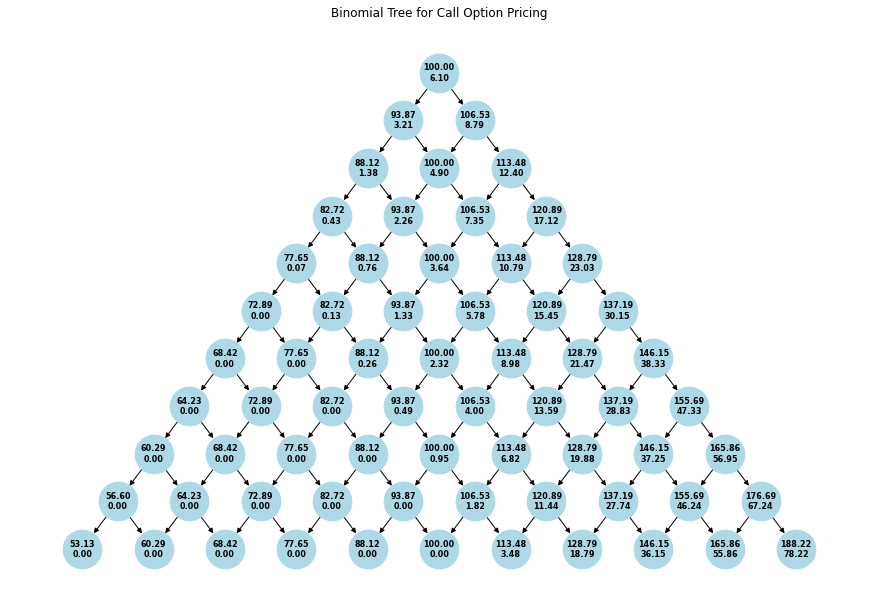

In [352]:
Option_type="Call"
option_value, asset_prices, option_values,greeks_data=binomial_tree_method(S, K, T, r, volatility, q, N, Option_type)
plot_binomial_tree(asset_prices, option_values,Option_type)

In [269]:
def plot_greek_asset_prices(asset_prices,greek,greek_name,option_type):
    plt.figure(figsize=(18,8))
    final_step=len(greek)-1
    plt.plot(asset_prices[final_step], greek[final_step], marker='o', label=greek_name)
    plt.xlabel('Asset Price')
    plt.ylabel(f'{greek_name}')
    plt.title(f'{greek_name} for American {option_type} option with Strike = {K} $')
    plt.legend()
    plt.grid(True)
    plt.show()

In [270]:
def plot_greek_convergence(N,step,greek,greek_name,option_type):
    steps=[i for i in range(step,N,step)]
    greek_values=[]
    for el in steps : 
        option_value, asset_prices, option_values,greeks_data=binomial_tree_method(S, K, T, r, volatility, q, el, Option_type)
        greek_values.append(greeks_data[greek_name.lower()][0][0])

    plt.figure(figsize=(18, 8))
    plt.plot(steps, greek_values, marker='o', linestyle='-', color='red', label=greek_name)
    plt.xlabel('Number of Steps')
    plt.ylabel(f'{greek_name}')
    plt.title(f'{greek_name} Convergence for American {Option_type} option with Strike = {K} $')
    plt.grid(True)
    plt.legend()
    plt.show()

In [271]:
def get_plot_greek(option_type):
    greek_table=['delta','gamma','theta','vega','rho']
    while True:
        greek = input('Enter the Greek to plot, choose between Delta, Gamma, Theta, Vega and Rho : ')
        try:
            greek_name = greek.lower()
            if greek_name in greek_table:
                method=input('Enter the method you want to see between Greek convergence and greek vs asset price (1 or 2): ')
                if int(method) not in [1,2] : 
                    print("Tape 1 or 2.")
                elif int(method) == 1 : 
                    Depth_max=input('Enter the maximal depth of the tree : ')
                    steps=input('Enter the steps for the convergence : ')
                    return plot_greek_convergence(int(Depth_max),int(steps),greeks_data[greek_name],greek_name.capitalize(),option_type)
                else : return plot_greek_asset_prices(asset_prices, greeks_data[greek_name], greek_name.capitalize(),option_type)
            else:
                print("Invalid Greek. Please enter a valid Greek: Delta, Gamma, Theta, Vega, or Rho.")
                
        except ValueError:
            print("Invalid type. Please enter a Greek in string format between Delta, Gamma, Theta, Vega and Rho.")

Greek Plots

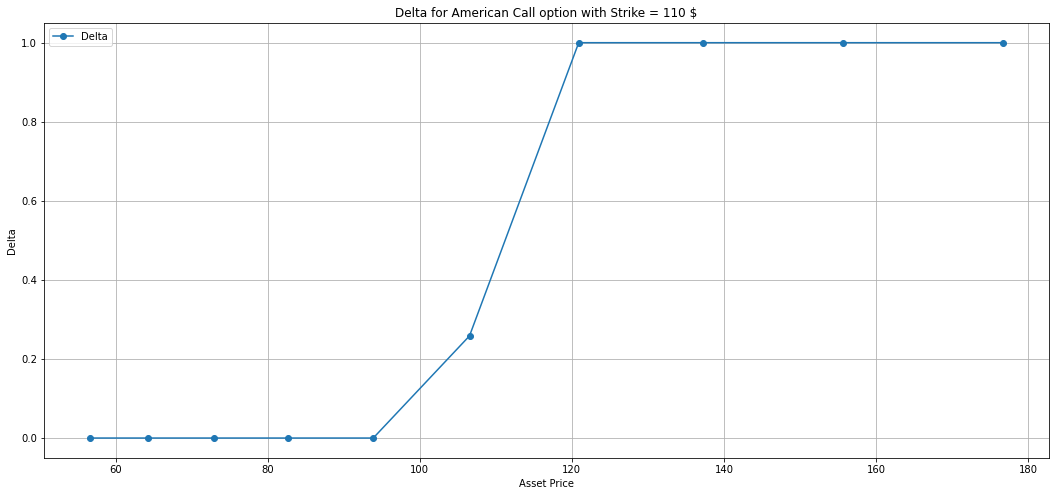

In [359]:
get_plot_greek(Option_type)

Greeks Convergence with N

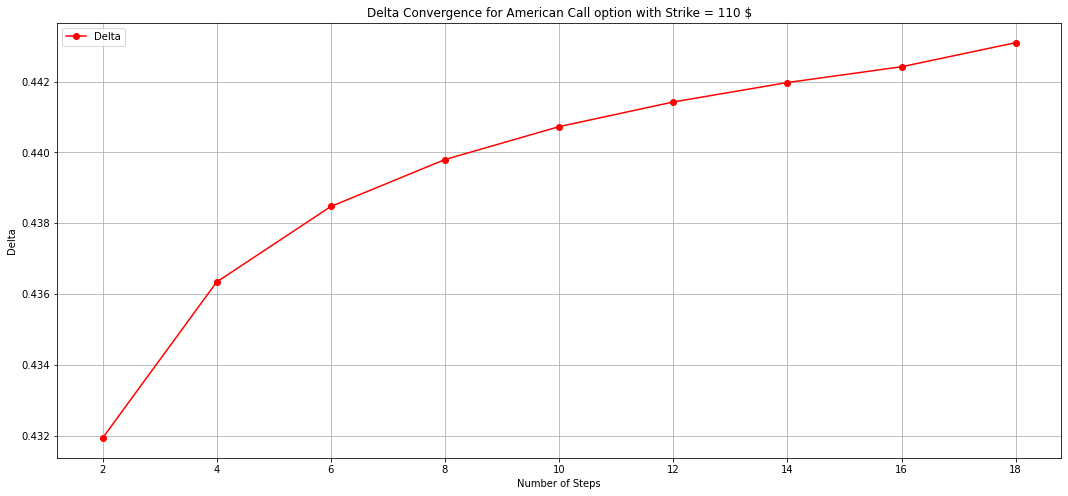

In [360]:
get_plot_greek(Option_type)